In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.preprocessing import StandardScaler

In [2]:
path = Path(r'C:\Users\tsuka\Desktop\txt')
path = Path(r'C:\Users\SI\Python_ML\NLTK_\txt')
path
path.glob('*')
list(path.glob('*'))
print('lists:', path.glob('*'))
#list path
path = list(path.glob('*'))
data = pd.read_table(path[0])
data, path

lists: <generator object Path.glob at 0x000001CE32C08990>


(                                    Inaugural Address
 0                   By President Barack Hussein Obama
 1                                    January 20, 2009
 2                                 My fellow citizens:
 3   I stand here today humbled by the task before ...
 4   I thank President Bush for his service to our ...
 5   Forty-four Americans have now taken the presid...
 6   So it has been; so it must be with this genera...
 7   That we are in the midst of crisis is now well...
 8   These are the indicators of crisis, subject to...
 9   Today I say to you that the challenges we face...
 10  On this day, we gather because we have chosen ...
 11  In reaffirming the greatness of our nation we ...
 12  For us, they packed up their few worldly posse...
 13  Time and again these men and women struggled a...
 14  This is the journey we continue today. We rema...
 15  For everywhere we look, there is work to be do...
 16  Now, there are some who question the scale of ...
 17  The q

In [3]:
file_content = open(path[0]).read()
tokens = nltk.word_tokenize(file_content)
tokens

['Inaugural',
 'Address',
 'By',
 'President',
 'Barack',
 'Hussein',
 'Obama',
 'January',
 '20',
 ',',
 '2009',
 'My',
 'fellow',
 'citizens',
 ':',
 'I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 "'ve",
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.',
 'I',
 'thank',
 'President',
 'Bush',
 'for',
 'his',
 'service',
 'to',
 'our',
 'nation',
 '--',
 '(',
 'applause',
 ')',
 '--',
 'as',
 'well',
 'as',
 'the',
 'generosity',
 'and',
 'cooperation',
 'he',
 'has',
 'shown',
 'throughout',
 'this',
 'transition',
 '.',
 'Forty-four',
 'Americans',
 'have',
 'now',
 'taken',
 'the',
 'presidential',
 'oath',
 '.',
 'The',
 'words',
 'have',
 'been',
 'spoken',
 'during',
 'rising',
 'tides',
 'of',
 'prosperity',
 'and',
 'the',
 'still',
 'waters',
 'of',
 'peace',
 '.',
 'Yet',
 ',',
 'every',
 'so',
 'often',
 ',',
 'the',
 'oath',


In [4]:
len(tokens), len(set(tokens))

(2766, 947)

In [5]:
tokens_l = [w.lower() for w in tokens] 

In [6]:
len(set(tokens_l))

908

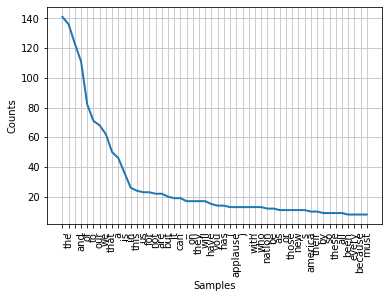

In [7]:
fd = nltk.FreqDist(tokens_l)
fd.plot(50)

In [8]:
bigrams = nltk.bigrams(tokens_l)
bigrams 

<generator object bigrams at 0x000001CE32C08EB8>

In [9]:
bigrams_copy = bigrams
fd = nltk.FreqDist(bigrams_copy)
fd.most_common()

[(('of', 'our'), 18),
 ((',', 'and'), 16),
 (('(', 'applause'), 13),
 ((',', 'but'), 13),
 ((',', 'we'), 13),
 ((',', 'the'), 12),
 (('.', '('), 11),
 (('applause', '.'), 11),
 (('.', ')'), 11),
 (('.', 'we'), 11),
 (('.', 'the'), 10),
 (('we', 'will'), 10),
 (('us', ','), 9),
 (('to', 'the'), 9),
 (('.', 'our'), 9),
 (('on', 'the'), 9),
 (('and', 'the'), 8),
 (('in', 'the'), 8),
 (('that', 'the'), 8),
 (('is', 'the'), 8),
 (('.', 'and'), 8),
 (('that', 'we'), 7),
 (('a', 'new'), 7),
 (('we', 'are'), 6),
 (('is', 'a'), 6),
 (('.', 'they'), 6),
 (('and', 'we'), 6),
 (('can', 'not'), 6),
 (('our', 'nation'), 5),
 (('.', 'but'), 5),
 (('.', 'for'), 5),
 (('we', 'can'), 5),
 (('that', 'our'), 5),
 (('it', 'is'), 5),
 (('the', 'world'), 5),
 (('of', 'the'), 4),
 (('have', 'been'), 4),
 ((',', 'a'), 4),
 ((',', 'our'), 4),
 (('no', 'less'), 4),
 ((',', 'that'), 4),
 (('in', 'a'), 4),
 (('we', 'have'), 4),
 (('.', 'it'), 4),
 ((',', 'or'), 4),
 (('men', 'and'), 4),
 (('and', 'women'), 4),
 ((

In [10]:
bigrams = nltk.bigrams(tokens_l)
bigrams 

cfd = nltk.ConditionalFreqDist(bigrams)
list(cfd['of']), cfd["of"].items()

(['the',
  'prosperity',
  'peace',
  'those',
  'our',
  'americans',
  'crisis',
  'violence',
  'greed',
  'some',
  'confidence',
  'time',
  'purpose',
  'scripture',
  'happiness',
  'short-cuts',
  'riches',
  'things',
  'a',
  'birth',
  'standing',
  'protecting',
  'remaking',
  'us',
  'day',
  'control',
  'charity',
  'law',
  'man',
  'generations',
  'each',
  'humility',
  'this',
  'life',
  'christians',
  'civil',
  'tribe',
  'dissent',
  'history',
  'poor',
  'service',
  'workers',
  'progress',
  'responsibility',
  'every',
  'citizenship',
  'who',
  'america',
  'months',
  'patriots',
  'an',
  'winter',
  'freedom'],
 dict_items([('the', 4), ('prosperity', 1), ('peace', 3), ('those', 1), ('our', 18), ('americans', 1), ('crisis', 2), ('violence', 1), ('greed', 1), ('some', 1), ('confidence', 1), ('time', 1), ('purpose', 1), ('scripture', 1), ('happiness', 1), ('short-cuts', 1), ('riches', 1), ('things', 1), ('a', 3), ('birth', 1), ('standing', 1), ('protect

In [11]:
bigrams = nltk.bigrams(tokens_l)
bigrams_of = []
for w in bigrams:
    if w[0] == 'of':
        bigrams_of.append(w)
print(bigrams_of)

[('of', 'the'), ('of', 'prosperity'), ('of', 'peace'), ('of', 'the'), ('of', 'those'), ('of', 'our'), ('of', 'americans'), ('of', 'crisis'), ('of', 'violence'), ('of', 'greed'), ('of', 'some'), ('of', 'crisis'), ('of', 'confidence'), ('of', 'time'), ('of', 'purpose'), ('of', 'scripture'), ('of', 'happiness'), ('of', 'our'), ('of', 'short-cuts'), ('of', 'riches'), ('of', 'things'), ('of', 'a'), ('of', 'the'), ('of', 'our'), ('of', 'birth'), ('of', 'standing'), ('of', 'protecting'), ('of', 'remaking'), ('of', 'our'), ('of', 'a'), ('of', 'our'), ('of', 'us'), ('of', 'day'), ('of', 'control'), ('of', 'our'), ('of', 'our'), ('of', 'our'), ('of', 'charity'), ('of', 'law'), ('of', 'man'), ('of', 'generations'), ('of', 'each'), ('of', 'peace'), ('of', 'our'), ('of', 'our'), ('of', 'humility'), ('of', 'this'), ('of', 'a'), ('of', 'life'), ('of', 'christians'), ('of', 'this'), ('of', 'civil'), ('of', 'tribe'), ('of', 'peace'), ('of', 'dissent'), ('of', 'history'), ('of', 'poor'), ('of', 'our'), 

In [12]:
cfd = nltk.ConditionalFreqDist(bigrams_of)
list(cfd['of'])

['the',
 'prosperity',
 'peace',
 'those',
 'our',
 'americans',
 'crisis',
 'violence',
 'greed',
 'some',
 'confidence',
 'time',
 'purpose',
 'scripture',
 'happiness',
 'short-cuts',
 'riches',
 'things',
 'a',
 'birth',
 'standing',
 'protecting',
 'remaking',
 'us',
 'day',
 'control',
 'charity',
 'law',
 'man',
 'generations',
 'each',
 'humility',
 'this',
 'life',
 'christians',
 'civil',
 'tribe',
 'dissent',
 'history',
 'poor',
 'service',
 'workers',
 'progress',
 'responsibility',
 'every',
 'citizenship',
 'who',
 'america',
 'months',
 'patriots',
 'an',
 'winter',
 'freedom']

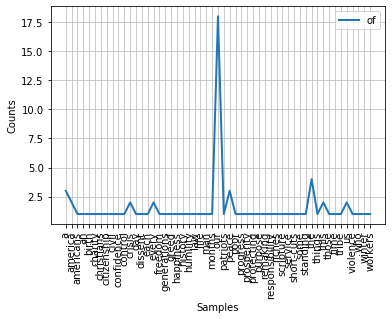

In [13]:
cfd.plot(conditions=['of'])